## Python Libraries - Pandas - Grouping and Pivoting

### Grouping

Grouping and aggregation are some of the most frequently used operations in data analysis, especially while performing exploratory data analysis (EDA), where comparing summary statistics across groups of data is common.

Grouping analysis can be thought of as having three parts, namely:
-  Splitting the data into groups (e.g., groups of customer segments, product categories, etc.)
-  Applying a function to each group (e.g., the mean or total sales of each customer segment)
-  Combining the results into a data structure showing summary statistics


In [14]:
# Loading libraries and file - sales.xlsx - with Market and Region as index
import pandas as pd


sales = pd.read_excel("sales.xlsx", index_col = 0)

In [15]:
# Checking the 'sales' dataframe 
sales

,Region,No_of_Orders,Profit,Sales
Market,,,,
Africa,Western Africa,251,-12901.51,78476.06
Africa,Southern Africa,85,11768.58,51319.50
Africa,North Africa,182,21643.08,86698.89
Africa,Eastern Africa,110,8013.04,44182.60
Africa,Central Africa,103,15606.30,61689.99
Asia Pacific,Western Asia,382,-16766.90,124312.24
Asia Pacific,Southern Asia,469,67998.76,351806.60
Asia Pacific,Southeastern Asia,533,20948.84,329751.38
Asia Pacific,Oceania,646,54734.02,408002.98


In [21]:
# Grouping the sales dataframe for the sum of the column 'No_of_Orders'

sales.groupby("Market").sum()

,No_of_Orders,Profit,Sales
Market,,,
Africa,731,44129.49,322367.04
Asia Pacific,2481,197070.06,1537454.71
Europe,1910,169290.89,1233569.09
LATAM,1714,100586.72,788713.82
USCA,1593,152701.57,862452.84


In [20]:
# Grouping the sales dataframe over the index 'Market' for the sum of the columns 'No_of_Orders' and 'Sales'
sales[["No_of_Orders"]].groupby("Market").sum()

,No_of_Orders
Market,
Africa,731
Asia Pacific,2481
Europe,1910
LATAM,1714
USCA,1593


In [22]:
# Grouping the sales dataframe over the index 'Market' for the maximum value in the column 'No_of_Orders'
sales[["No_of_Orders"]].groupby("Market").max()

,No_of_Orders
Market,
Africa,251
Asia Pacific,646
Europe,964
LATAM,930
USCA,490


In [26]:
# Creating a dataframe 'df' with the mean of column 'Profit' for each market
a = sales[["Profit"]].groupby("Market").mean()
a

,Profit
Market,
Africa,8825.898000
Asia Pacific,32845.010000
Europe,42322.722500
LATAM,33528.906667
USCA,30540.314000


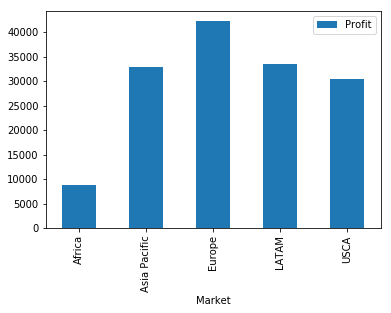

In [29]:
# Plotting a bar graph over 'df'
a.plot(kind = "bar")

### Pivoting

You may want to use pandas pivot tables as an alternative to ```groupby()```. They provide Excel-like functionalities to create aggregate tables. 

In [30]:
# Read the help documentation for pivot_table
help(pd.DataFrame.pivot_table)

Help on function pivot_table in module pandas.core.frame:

pivot_table(self, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
    Create a spreadsheet-style pivot table as a DataFrame. The levels in
    the pivot table will be stored in MultiIndex objects (hierarchical
    indexes) on the index and columns of the result DataFrame
    
    Parameters
    ----------
    values : column to aggregate, optional
    index : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can contain any of the other types (except list).
        Keys to group by on the pivot table index.  If an array is passed,
        it is being used as the same manner as column values.
    columns : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can contain any of the other types

In [31]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
# Create a new dataframe
users= pd.DataFrame({"weekday" : ['Sun', 'Sun', 'Mon', 'Mon'],
                    "city": ['Austin', 'Dallas', 'Austin', 'Dallas'],
                    "visitors":[139, 237, 326, 456],
                    "signups" : [7, 12, 3, 5]})

In [35]:
# Set the index of the dataframe as 'weekday'
users.set_index("weekday")

,city,visitors,signups
weekday,,,
Sun,Austin,139,7
Sun,Dallas,237,12
Mon,Austin,326,3
Mon,Dallas,456,5


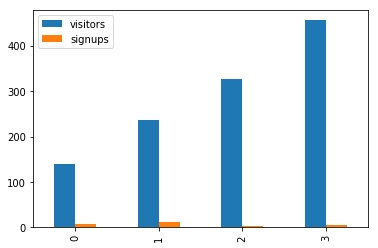

In [36]:
# plot a bar graph over the dataframe 'users'
users.plot(kind = "bar")

In [57]:
# Create a pivot table with the columns as 'city' summarising the variable 'visitors'
visitors_in_city = users.pivot_table(columns = "city", values = "visitors")

In [58]:
# Check the created pivot table
visitors_in_city

city,Austin,Dallas
visitors,232.5,346.5


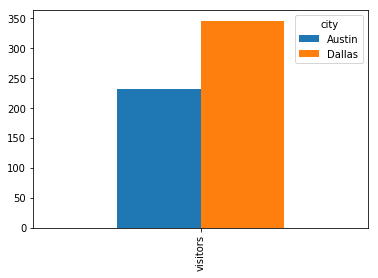

In [59]:
# Draw a bar graph over the created pivot
visitors_in_city.plot(kind = "bar")

In [60]:
# Create a pivot table with the columns as 'city' summarising all the variables
city_pivot = users.pivot_table(columns = "city")

In [61]:
# Check the created pivot table
city_pivot

city,Austin,Dallas
signups,5.0,8.5
visitors,232.5,346.5


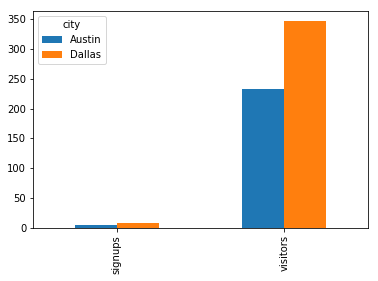

In [62]:
# Draw a bar graph over the created pivot for each variable
city_pivot.plot(kind = "bar")